# Building an Model on Time Series Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'E:\Rajeesh\Linear Regression\ARIMA\AirPassengers.csv')

In [4]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Understanding the dataset

In [6]:
df.shape

(144, 2)

In [7]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [8]:
#Renaming the colum to reflect correct format of name
df=df.rename(columns={'Month':'Month','#Passengers':'Passengers'})

In [9]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [10]:
#checking for null values
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [14]:
#converting the data type of Month colum form String to Date type
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [18]:
#setting Month column as index
df.set_index('Month',inplace=True)

In [19]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## DataVizualization

<AxesSubplot:xlabel='Month'>

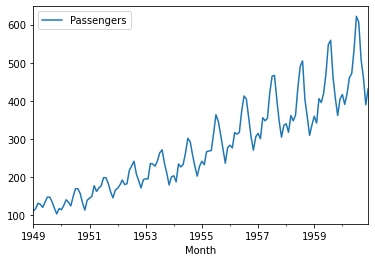

In [20]:
df.plot()

In [60]:
#Rolling Mean and STD
df2=df

In [61]:
df2['mean_Passengers']=df2['Passengers'].rolling(10).mean()

In [62]:
df2['std_Passengers']=df2['Passengers'].rolling(10).std()

In [63]:
df2['var_Passengers']=df2['Passengers'].rolling(10).var()

<AxesSubplot:title={'center':'Original data vs moving average-std'}, xlabel='Month'>

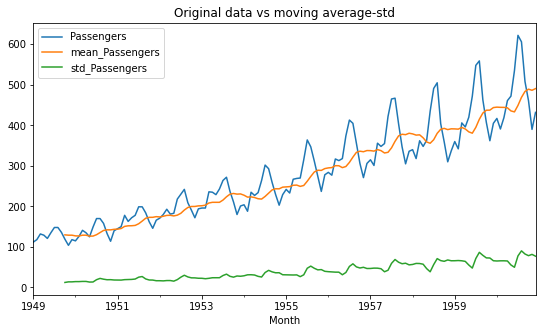

In [64]:
df2[['Passengers','mean_Passengers','std_Passengers']].plot(figsize=(9,5),title='Original data vs moving average-std')

In [23]:
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller

In [37]:
adfuller(df['Passengers'])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [55]:
#Creating small function for adfuller result
def adf_test(series):
    result=adfuller(series)
    print(f'ADF Statistics: {result[0]}')
    print(f'p- value:{result[1]}')
    if result[1]<=0.5:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print(f'weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [56]:
adf_test(df['Passengers'])

ADF Statistics: 0.8153688792060482
p- value:0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [65]:
#Convert the Non stationary data to stationary using Differencing Technic
df['Passengers_First_Difference']=df['Passengers']-df['Passengers'].shift(1)

In [66]:
df.head()

,Passengers,mean_Passengers,std_Passengers,var_Passengers,Passengers_First_Difference
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,6.0
1949-03-01,132,NaN,NaN,NaN,14.0
1949-04-01,129,NaN,NaN,NaN,-3.0
1949-05-01,121,NaN,NaN,NaN,-8.0


In [68]:
adf_test(df['Passengers_First_Difference'].dropna())

ADF Statistics: -2.8292668241699994
p- value:0.0542132902838255
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [74]:
df['Passengers_Second_Difference']=df['Passengers_First_Difference']-df['Passengers_First_Difference'].shift(1)

In [75]:
df.head(20)

,Passengers,mean_Passengers,std_Passengers,var_Passengers,Passengers_First_Difference,Passengers_Second_Difference
Month,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,6.0,NaN
1949-03-01,132,NaN,NaN,NaN,14.0,8.0
1949-04-01,129,NaN,NaN,NaN,-3.0,-17.0
1949-05-01,121,NaN,NaN,NaN,-8.0,-5.0
1949-06-01,135,NaN,NaN,NaN,14.0,22.0
1949-07-01,148,NaN,NaN,NaN,13.0,-1.0
1949-08-01,148,NaN,NaN,NaN,0.0,-13.0
1949-09-01,136,NaN,NaN,NaN,-12.0,-12.0


In [76]:
adf_test(df['Passengers_Second_Difference'].dropna())

ADF Statistics: -16.384231542468505
p- value:2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [79]:
##12 month Differencing
df['Passengers_12months_difference']=df['Passengers']-df['Passengers'].shift(12)


In [80]:
df

,Passengers,mean_Passengers,std_Passengers,var_Passengers,Passengers_First_Difference,Passengers_Second_Difference,Passengers_12months_difference
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,6.0,NaN,NaN
1949-03-01,132,NaN,NaN,NaN,14.0,8.0,NaN
1949-04-01,129,NaN,NaN,NaN,-3.0,-17.0,NaN
1949-05-01,121,NaN,NaN,NaN,-8.0,-5.0,NaN
...,...,...,...,...,...,...,...
1960-08-01,606,469.0,90.332718,8160.000000,-16.0,-103.0,47.0
1960-09-01,508,483.6,82.583560,6820.044444,-98.0,-82.0,45.0
1960-10-01,461,489.2,78.457065,6155.511111,-47.0,51.0,54.0


In [82]:
adf_test(df['Passengers_12months_difference'].dropna())

ADF Statistics: -3.383020726492481
p- value:0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [83]:
#Now our data became stationary and ready for ARIMA  model building
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

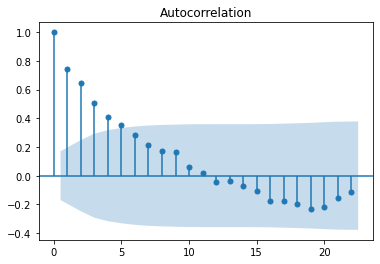

In [85]:
#we are going to use the colum Passengers_12months_difference for further analysis
#Make sure nan value is droped
acf=plot_acf(df['Passengers_12months_difference'].dropna())

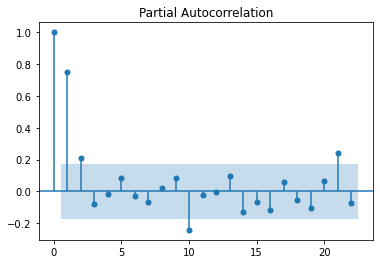

In [88]:
pacf=plot_pacf(df['Passengers_12months_difference'].dropna())

In [89]:
#splitting Train and Test data
df

,Passengers,mean_Passengers,std_Passengers,var_Passengers,Passengers_First_Difference,Passengers_Second_Difference,Passengers_12months_difference
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,6.0,NaN,NaN
1949-03-01,132,NaN,NaN,NaN,14.0,8.0,NaN
1949-04-01,129,NaN,NaN,NaN,-3.0,-17.0,NaN
1949-05-01,121,NaN,NaN,NaN,-8.0,-5.0,NaN
...,...,...,...,...,...,...,...
1960-08-01,606,469.0,90.332718,8160.000000,-16.0,-103.0,47.0
1960-09-01,508,483.6,82.583560,6820.044444,-98.0,-82.0,45.0
1960-10-01,461,489.2,78.457065,6155.511111,-47.0,51.0,54.0


In [133]:
df['Passengers'] = df['Passengers'].astype(float)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Passengers                      144 non-null    float64
 1   mean_Passengers                 135 non-null    float64
 2   std_Passengers                  135 non-null    float64
 3   var_Passengers                  135 non-null    float64
 4   Passengers_First_Difference     143 non-null    float64
 5   Passengers_Second_Difference    142 non-null    float64
 6   Passengers_12months_difference  132 non-null    float64
dtypes: float64(7)
memory usage: 14.0 KB


In [135]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_ataset_end=datetime(1960,12,1)

In [136]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_ataset_end]

In [137]:
#Prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [138]:
train_data

,Passengers,mean_Passengers,std_Passengers,var_Passengers,Passengers_First_Difference,Passengers_Second_Difference,Passengers_12months_difference
Month,,,,,,,
1949-01-01,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN,6.0,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN,14.0,8.0,NaN
1949-04-01,129.0,NaN,NaN,NaN,-3.0,-17.0,NaN
1949-05-01,121.0,NaN,NaN,NaN,-8.0,-5.0,NaN
...,...,...,...,...,...,...,...
1955-08-01,347.0,273.9,52.673945,2774.544444,-17.0,-66.0,54.0
1955-09-01,312.0,284.8,47.384479,2245.288889,-35.0,-18.0,53.0
1955-10-01,274.0,289.3,43.471702,1889.788889,-38.0,-3.0,45.0


In [139]:
test_data

,Passengers,mean_Passengers,std_Passengers,var_Passengers,Passengers_First_Difference,Passengers_Second_Difference,Passengers_12months_difference
Month,,,,,,,
1956-01-01,284.0,295.0,38.972925,1518.888889,6.0,-35.0,42.0
1956-02-01,277.0,295.8,38.458636,1479.066667,-7.0,-13.0,44.0
1956-03-01,317.0,300.5,37.821951,1430.500000,40.0,47.0,50.0
1956-04-01,313.0,300.3,37.741960,1424.455556,-4.0,-44.0,44.0
1956-05-01,318.0,295.7,31.383116,984.900000,5.0,9.0,48.0
1956-06-01,374.0,298.4,36.954025,1365.600000,56.0,51.0,59.0
1956-07-01,413.0,308.5,51.874314,2690.944444,39.0,-17.0,49.0
1956-08-01,405.0,321.6,58.332762,3402.711111,-8.0,-47.0,58.0
1956-09-01,355.0,333.4,50.761315,2576.711111,-50.0,-42.0,43.0


## Creating ARIMA Model

In [140]:
#Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
from statsmodels.tsa.arima_model import ARIMA

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [189]:
model_arima=ARIMA(train_data['Passengers'],order=(2,1,2))

In [190]:
model_arima_fit=model_arima.fit()

In [191]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   83
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -354.943
Method:                       css-mle   S.D. of innovations             16.193
Date:                Wed, 14 Sep 2022   AIC                            721.887
Time:                        23:00:49   BIC                            736.400
Sample:                    02-01-1949   HQIC                           727.717
                         - 12-01-1955                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1402      0.034     63.182      0.000       2.074       2.207
ar.L1.D.Passengers     1.5862      0.068     23.309      0.000       1.453       1.720
ar.L2.D.Passengers    -0.7793      0.066    -11.720      0.000      -0.910      -0.649
ma.L1.D.Passengers    -1.9992      0.082    -24.428      0.000      -2.160      -1.839
ma.L2.D.Passengers     0.9992      0.082     12.235      0.000       0.839       1.159
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0177           -0.4975j            1.1328           -0.0724
AR.2            1.0177           +0.4975j            1.1328            0.0724
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.0008           +0.0000j            1.0008            0.0000
-----------------------------------------------------------------------------
"""

In [192]:
#prediction
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [193]:
type(pred_start_date)

pandas._libs.tslibs.timestamps.Timestamp

In [194]:
type(pred_end_date)

pandas._libs.tslibs.timestamps.Timestamp

In [195]:
#objectdate = datetime.fromtimestamp (objtmstmp)

In [196]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Passengers                      144 non-null    float64
 1   mean_Passengers                 135 non-null    float64
 2   std_Passengers                  135 non-null    float64
 3   var_Passengers                  135 non-null    float64
 4   Passengers_First_Difference     143 non-null    float64
 5   Passengers_Second_Difference    142 non-null    float64
 6   Passengers_12months_difference  132 non-null    float64
dtypes: float64(7)
memory usage: 14.0 KB


In [198]:
pred

1956-01-01   -12.485992
1956-02-01    -5.928632
1956-03-01     0.739508
1956-04-01     6.206382
1956-05-01     9.681490
1956-06-01    10.933406
1956-07-01    10.211070
1956-08-01     8.089703
1956-09-01     5.287715
1956-10-01     2.496379
1956-11-01     0.252343
1956-12-01    -1.131875
1957-01-01    -1.578757
1957-02-01    -1.208893
1957-03-01    -0.273966
1957-04-01     0.920776
1957-05-01     2.087290
1957-06-01     3.006556
1957-07-01     3.555637
1957-08-01     3.710211
1957-09-01     3.527503
1957-10-01     3.117235
1957-11-01     2.608853
1957-12-01     2.122179
1958-01-01     1.746396
1958-02-01     1.529592
1958-03-01     1.478543
1958-04-01     1.566522
1958-05-01     1.745856
1958-06-01     1.961752
1958-07-01     2.164454
1958-08-01     2.317730
1958-09-01     2.402894
1958-10-01     2.418534
1958-11-01     2.376974
1958-12-01     2.298864
1959-01-01     2.207354
1959-02-01     2.123071
1959-03-01     2.060696
1959-04-01     2.027437
1959-05-01     2.023290
1959-06-01     2

In [199]:
residuals=test_data['Passengers']-pred


In [200]:
residuals

Month
1956-01-01    296.485992
1956-02-01    282.928632
1956-03-01    316.260492
1956-04-01    306.793618
1956-05-01    308.318510
1956-06-01    363.066594
1956-07-01    402.788930
1956-08-01    396.910297
1956-09-01    349.712285
1956-10-01    303.503621
1956-11-01    270.747657
1956-12-01    307.131875
1957-01-01    316.578757
1957-02-01    302.208893
1957-03-01    356.273966
1957-04-01    347.079224
1957-05-01    352.912710
1957-06-01    418.993444
1957-07-01    461.444363
1957-08-01    463.289789
1957-09-01    400.472497
1957-10-01    343.882765
1957-11-01    302.391147
1957-12-01    333.877821
1958-01-01    338.253604
1958-02-01    316.470408
1958-03-01    360.521457
1958-04-01    346.433478
1958-05-01    361.254144
1958-06-01    433.038248
1958-07-01    488.835546
1958-08-01    502.682270
1958-09-01    401.597106
1958-10-01    356.581466
1958-11-01    307.623026
1958-12-01    334.701136
1959-01-01    357.792646
1959-02-01    339.876929
1959-03-01    403.939304
1959-04-01    393.9

<AxesSubplot:ylabel='Density'>

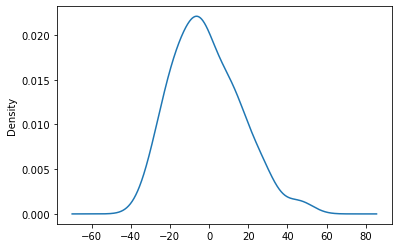

In [201]:
model_arima_fit.resid.plot(kind='kde')

In [202]:
test_data['Predicted_ARIMA']=pred

<AxesSubplot:xlabel='Month'>

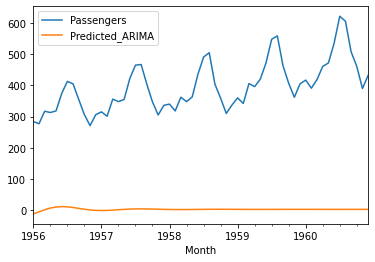

In [203]:
test_data[['Passengers','Predicted_ARIMA']].plot()

<AxesSubplot:xlabel='Month'>

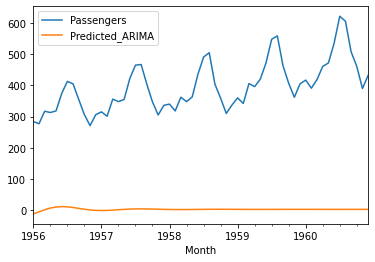

In [204]:
test_data[['Passengers','Predicted_ARIMA',]].plot()

In [207]:
# Ceate SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [208]:
model_SARIMA=SARIMAX(train_data['Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [209]:
model_SARIMA_fit=model_SARIMA.fit()

In [210]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Wed, 14 Sep 2022   AIC                            548.481
Time:                                     23:39:36   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5991      0.938      0.639      0.523      -1.239       2.437
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4533      0.894     -0.507      0.612      -2.205       1.299
ma.L1          0.1830      1.165      0.157      0.875      -2.101       2.466
ma.L2         -0.5349      1.263     -0.423      0.672      -3.011       1.941
ma.L3         -0.0985      0.384     -0.256      0.798      -0.852       0.655
ma.L4         -0.1271      0.338     -0.377      0.706      -0.789       0.534
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.947
sigma2        87.7264     81.195      1.080      0.280     -71.414     246.866
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [212]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

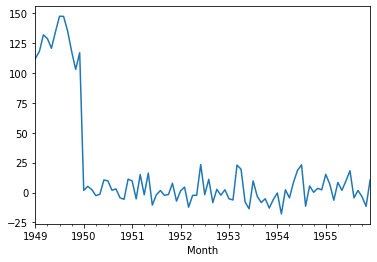

In [213]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

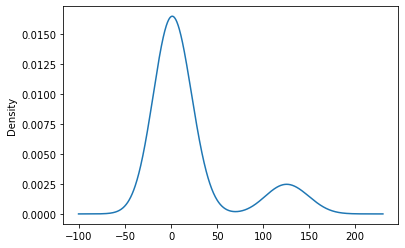

In [214]:
model_SARIMA_fit.resid.plot(kind='kde')

In [215]:
test_data['Predicted_SARIMA']=pred_Sarima

<AxesSubplot:xlabel='Month'>

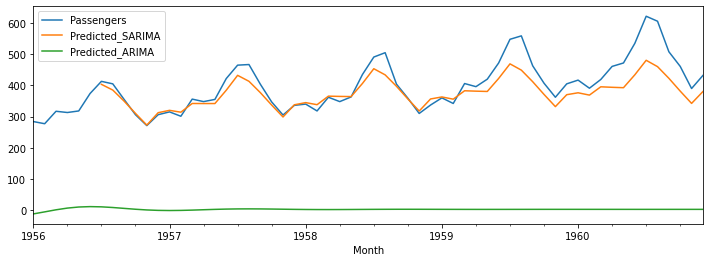

In [217]:
test_data[['Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize=(12,4))

# Summary

In [ ]:
'''
SARIMA model work better than ARIMA model, since the data is seasonal data
'''